In [15]:
# libraries
import pandas as pd
import  numpy as np

In [28]:
# get the data
data = pd.read_csv("airmiles.csv", index_col="Date")
data.head(15)

,airmiles
Date,
1/1/1996,30983174
1/2/1996,32147663
1/3/1996,38342975
1/4/1996,35969113
1/5/1996,36474391
1/6/1996,38772238
1/7/1996,40395657
1/8/1996,41738499
1/9/1996,33580773


In [17]:
#data = pd.read_csv("airmiles.csv", index_col="Date", parse_dates=True)
#data.head(15)

,airmiles
Date,
1996-01-01,30983174
1996-01-02,32147663
1996-01-03,38342975
1996-01-04,35969113
1996-01-05,36474391
1996-01-06,38772238
1996-01-07,40395657
1996-01-08,41738499
1996-01-09,33580773


Esta solución no es la indicada, vemos que con parse_dates, convirtió la columna DATE en el formato Y/d/m (INCORRECTO)

In [29]:
data.index = pd.to_datetime(arg=data.index,
                            format= "%d/%m/%Y")
data.head(2)

,airmiles
Date,
1996-01-01,30983174
1996-02-01,32147663


Ahora si, tenemos año, mes, dia

## Tareas

### 1. Set index Frecuency to Monthly. Use "MS"

In [30]:
data = data.asfreq(freq="MS")
data.index

DatetimeIndex(['1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01',
               ...
               '2004-08-01', '2004-09-01', '2004-10-01', '2004-11-01',
               '2004-12-01', '2005-01-01', '2005-02-01', '2005-03-01',
               '2005-04-01', '2005-05-01'],
              dtype='datetime64[ns]', name='Date', length=113, freq='MS')

### 2. Visualice Data

In [36]:
#transformando columnas
data = data.rename(columns = {"airmiles": "y"})
data.head()

,y
Date,
1996-01-01,30983174
1996-02-01,32147663
1996-03-01,38342975
1996-04-01,35969113
1996-05-01,36474391


<AxesSubplot: xlabel='Date'>

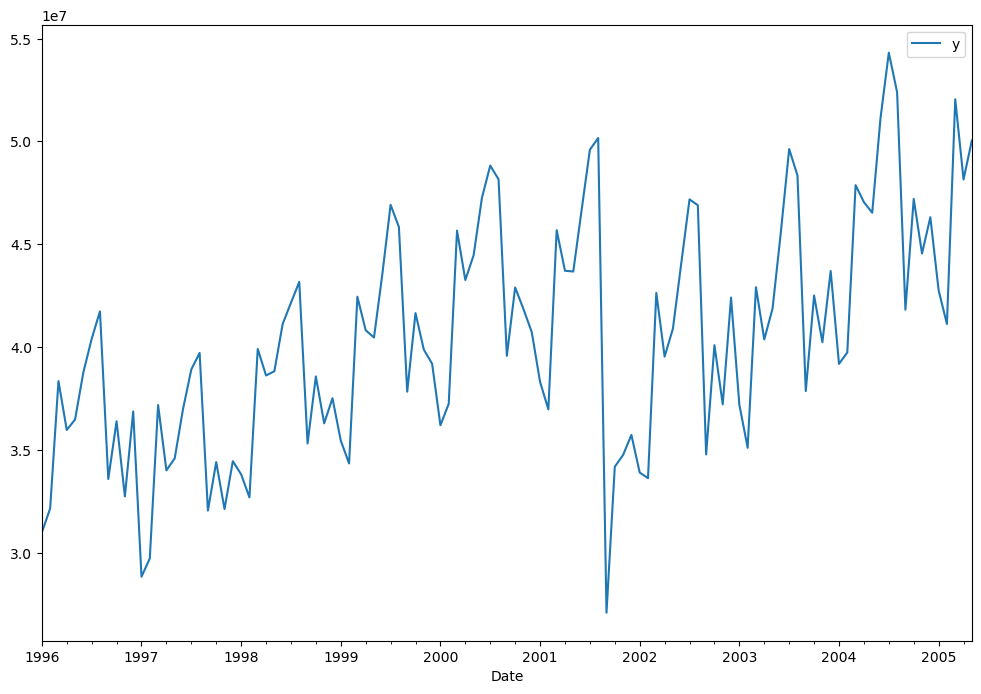

In [38]:
data['y'].plot(figsize=(12,8),legend=True)

### 3. Create a Training and Test Set. Test Set should be 12 months

In [40]:
test_set = 12
training_set = data.iloc[:-test_set,:]
test_set = data.iloc[-test_set:,:]
test_set.head()

,y
Date,
2004-06-01,51134050
2004-07-01,54317314
2004-08-01,52392985
2004-09-01,41816777
2004-10-01,47205665


### 4. Create a Holt-Winter Model

In [41]:
#librerias
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [43]:
#forecasting Model
model = ExponentialSmoothing(endog=training_set['y'],
                             trend='add',
                             seasonal='mul',
                             seasonal_periods=12).fit()

c:\Users\leoma\Desktop\projects\env\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [44]:
predictions_hw = model.forecast(steps=len(test_set)).rename("HW")
predictions_hw

2004-06-01    4.985031e+07
2004-07-01    5.224279e+07
2004-08-01    5.236168e+07
2004-09-01    4.136596e+07
2004-10-01    4.618046e+07
2004-11-01    4.350886e+07
2004-12-01    4.564370e+07
2005-01-01    4.123315e+07
2005-02-01    4.082851e+07
2005-03-01    5.023941e+07
2005-04-01    4.767275e+07
2005-05-01    4.818133e+07
Freq: MS, Name: HW, dtype: float64

### 5. Plotting

<AxesSubplot: xlabel='Date'>

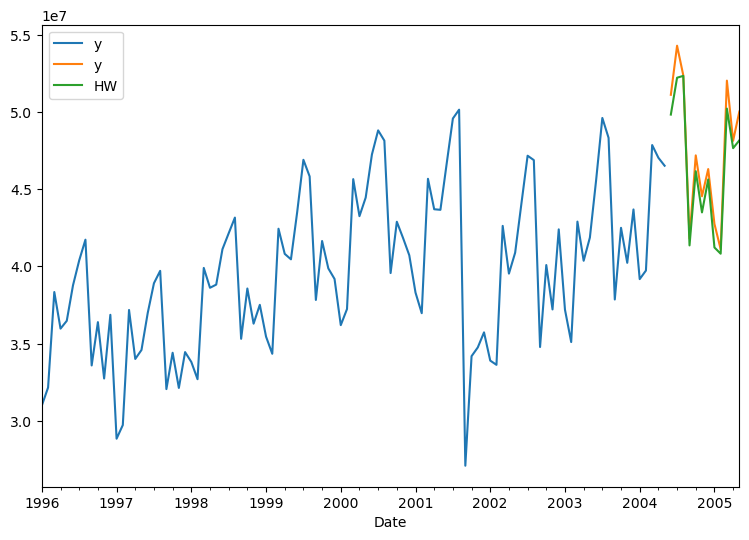

In [46]:
# PLotting
training_set['y'].plot(figsize=(9,6), legend=True)
test_set['y'].plot(legend=True)
predictions_hw.plot(legend=True)

In [50]:
# MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_set['y'], predictions_hw)

1046933.5311963558